In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns

from pangeapy.cell import CellAnnotator
from pangeapy.meta import MetaAnnotator

In [2]:
cell_anno = CellAnnotator()
meta_anno = MetaAnnotator()

Checking-up download status of anno_models
Checking-up download status of meta_models


In [81]:
import matplotlib.pyplot as plt



# 0) importing dataset

In [ ]:
adata = sc.read("COMBAT2022.h5ad")

In [4]:
adata.shape

(836148, 37412)

In [5]:
## scale of the input data: count normalized (10^4) & log1p
adata.X.max(), adata.X.min()

(9.092888, 0.0)

In [6]:
adata.obs['Sample'] = adata.obs['scRNASeq_sample_ID'].copy()
adata.var = adata.var.set_index('feature_name')

# 1) Cell annotation

In [7]:
## Batch-unaware annotation transfer (drop sample_key for batch-unaware transfer)
pred = cell_anno.annotate(adata, sample_key='Sample')

start cell type annotation: S00109-Ja001E-PBCa
start cell type annotation: S00112-Ja003E-PBCa
start cell type annotation: G05153-Ja005E-PBCa
start cell type annotation: S00005-Ja005E-PBCa
start cell type annotation: S00061-Ja003E-PBCa
start cell type annotation: U00515-Ua005E-PBUa
start cell type annotation: S00056-Ja003E-PBCa
start cell type annotation: N00027-Ja001E-PBGa
start cell type annotation: H00067-Ha001E-PBGa
start cell type annotation: U00505-Ua005E-PBUa
start cell type annotation: S00028-Ja001E-PBCa
start cell type annotation: N00023-Ja001E-PBGa
start cell type annotation: G05064-Ja005E-PBCa
start cell type annotation: S00043-Ja005E-PBCa
start cell type annotation: S00027-Ja003E-PBCa
start cell type annotation: G05097-Ja005E-PBCa
start cell type annotation: S00033-Ja001E-PBCa
start cell type annotation: N00018-Ja003E-PBGa
start cell type annotation: S00040-Ja005E-PBCa
start cell type annotation: N00024-Ja001E-PBGa
start cell type annotation: H00054-Ha001E-PBGa
start cell ty

In [8]:
adata

AnnData object with n_obs × n_vars = 836148 × 37412
    obs: 'Source', 'GEX_region', 'cluster', 'cluster_source', 'minor_subset', 'minor_subset_source', 'major_subset', 'major_subset_source', 'cell_type_source', 'donor_id', 'scRNASeq_sample_ID', 'Age', 'Hospitalstay', 'TimeSinceOnset', 'QC_ngenes', 'QC_total_UMI', 'QC_pct_mitochondrial', 'QC_scrub_doublet_scores', 'TCR_clone_count', 'TCR_clone_proportion', 'BCR_total_mut_HC', 'BCR_clonal_abundance_HC', 'BCR_total_mut_LC', 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'cell_type_original', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'Sample'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype'
    uns: 'Institute', 'Obje

In [9]:
pred.head()

,Level1|predicted_labels,Level1|over_clustering,Level1|majority_voting,Level1|conf_score,Level1|cert_score,Level2|predicted_labels,Level2|over_clustering,Level2|majority_voting,Level2|conf_score,Level2|cert_score,PG_annotations,PG_combined_score,Sample
AAACCTGAGAAAGTGG-1-gPlexA1,T&NK,4,T&NK,0.999999,0.275238,NK_CD16,36,NK_CD16,0.999932,0.216732,T&NK|NK_CD16,0.999966,S00109-Ja001E-PBCa
AAAGATGGTTCCACTC-1-gPlexA1,T&NK,29,T&NK,0.999993,0.503419,NK_CD16,35,NK_CD16,0.992871,0.344663,T&NK|NK_CD16,0.996425,S00109-Ja001E-PBCa
AAAGCAACACCAACCG-1-gPlexA1,Hematopoietic,19,Monocyte,0.991328,0.197027,ISG,10,ISG,0.571501,0.680174,Monocyte|ISG,0.752691,S00109-Ja001E-PBCa
AAATGCCGTGTTAAGA-1-gPlexA1,T&NK,25,T&NK,1.000000,0.264982,NK_CD16,20,NK_CD16,0.999329,0.168744,T&NK|NK_CD16,0.999664,S00109-Ja001E-PBCa
AACACGTAGATGGGTC-1-gPlexA1,Monocyte,48,Monocyte,0.952847,0.253699,ISG,21,ISG,1.000000,1.000000,Monocyte|ISG,0.976139,S00109-Ja001E-PBCa


In [11]:
## merging annotation result
adata.obs = adata.obs.merge(pred.drop('Sample', axis = 1), left_index = True, right_index = True, how = 'left')

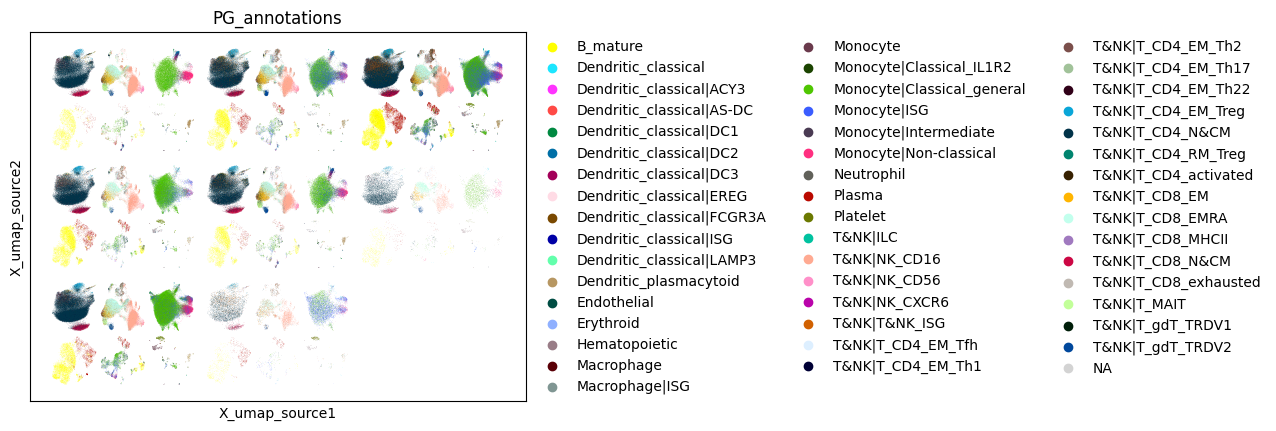

In [14]:
sc.pl.embedding(adata, color = 'PG_annotations', basis = 'X_umap_source')

## Comparing with manual annotations

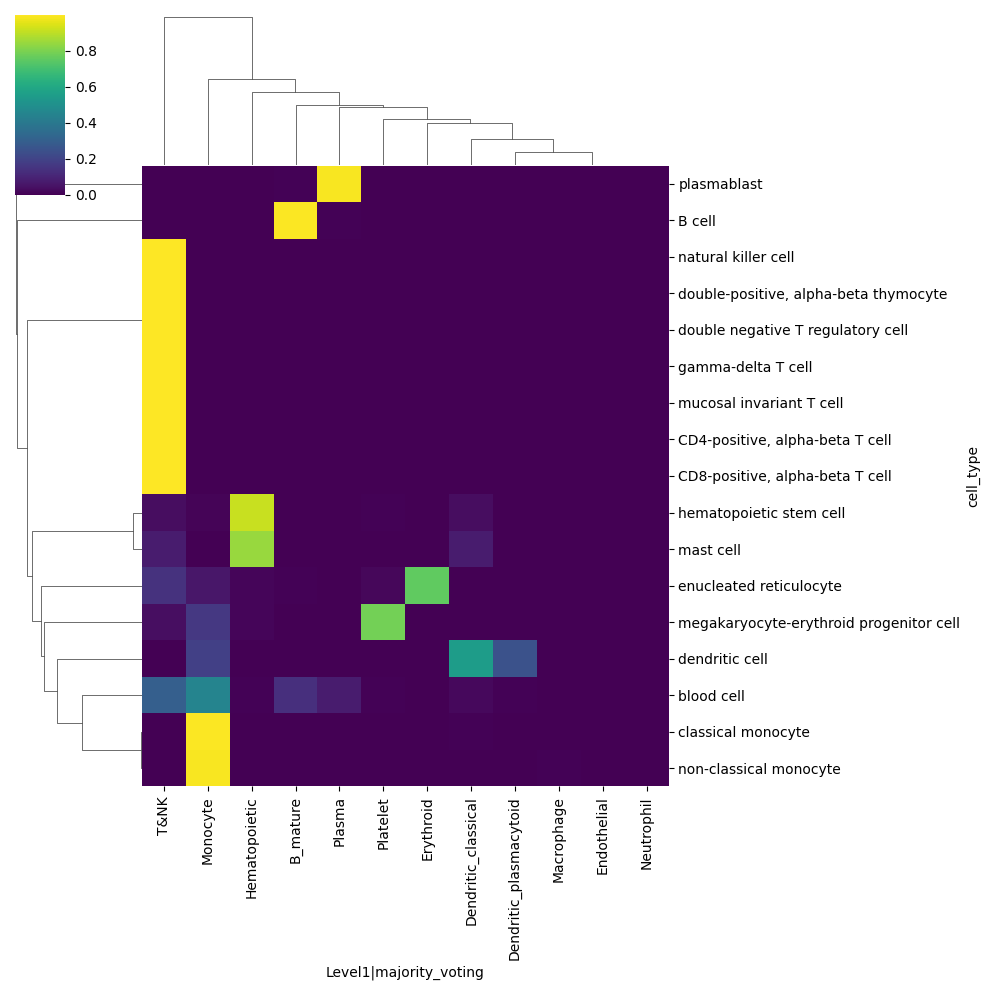

In [34]:
sns.clustermap(pd.crosstab(adata.obs['cell_type'], adata.obs['Level1|majority_voting'], normalize=0),
              figsize=(10,10), cmap = 'viridis')

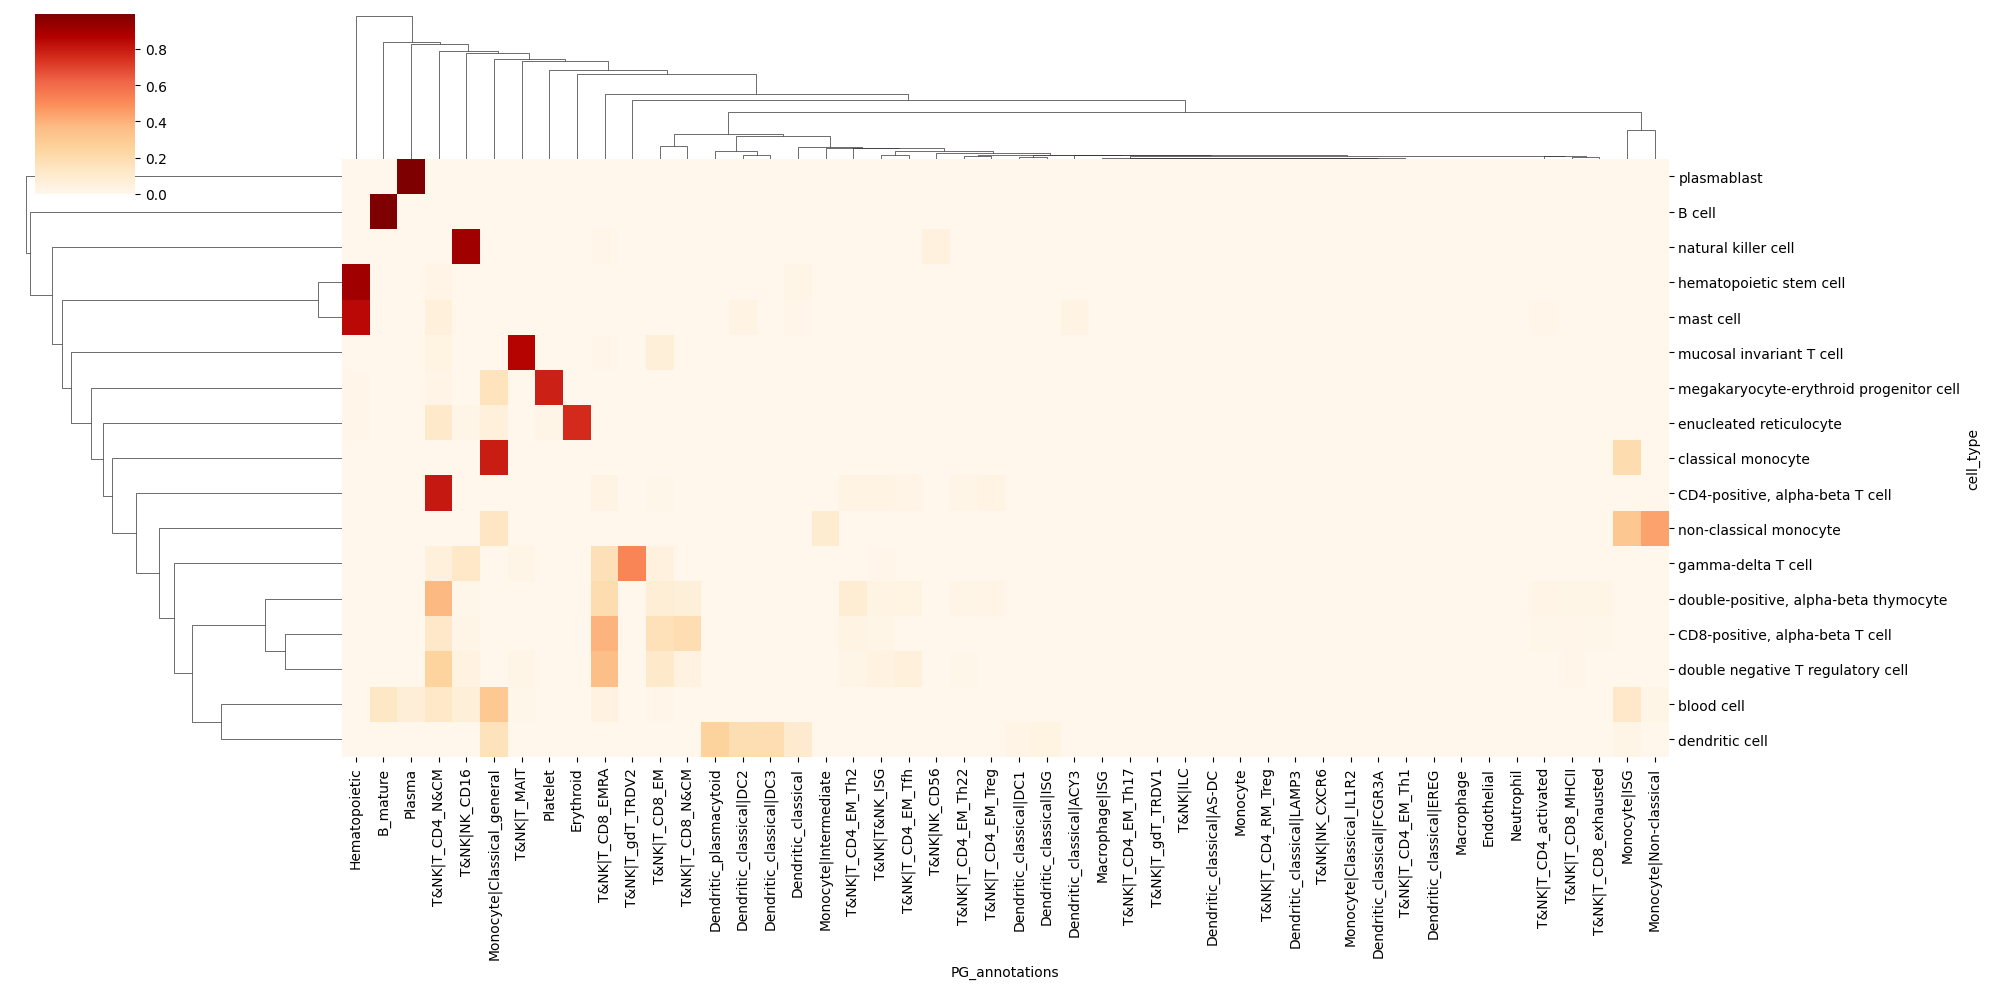

In [25]:
sns.clustermap(pd.crosstab(adata.obs['cell_type'], adata.obs['PG_annotations'], normalize=0),
              figsize=(20,10), cmap = 'OrRd')

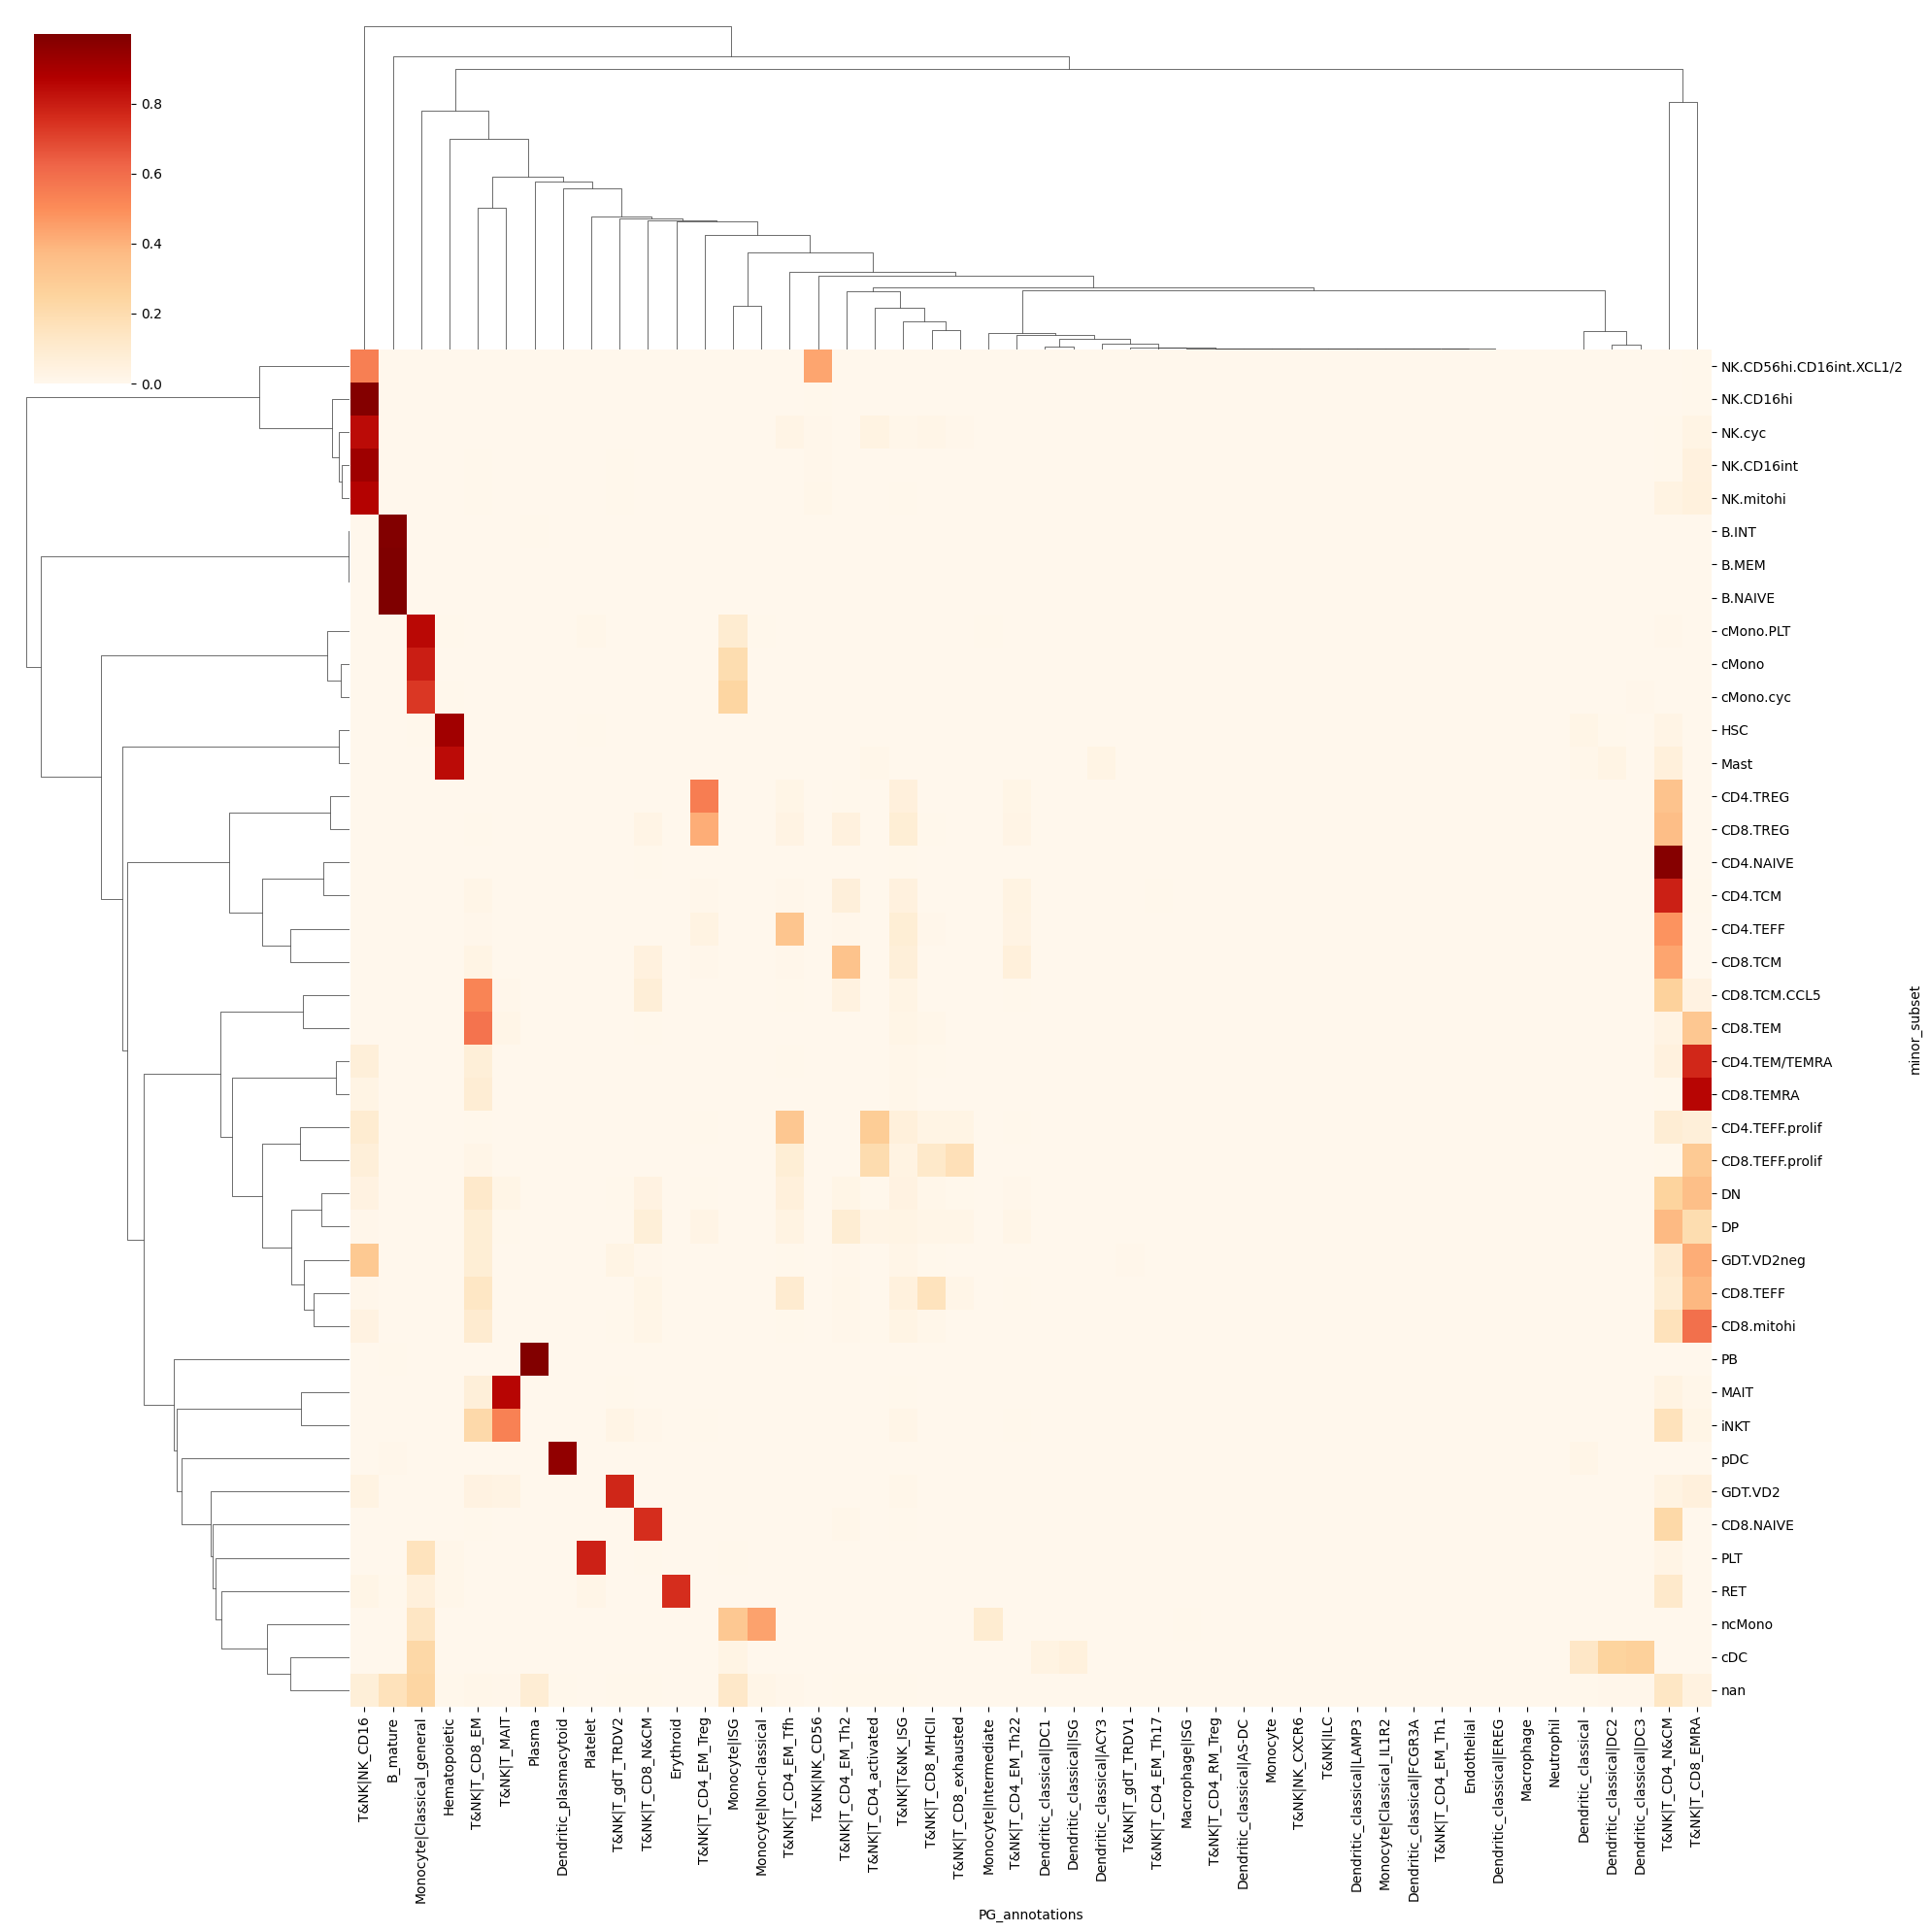

In [37]:
sns.clustermap(pd.crosstab(adata.obs['minor_subset'], adata.obs['PG_annotations'], normalize=0),
              figsize=(20,20), cmap = 'OrRd', method = 'ward')

# 2) Metadata prediction

In [39]:
pred.head()

,Level1|predicted_labels,Level1|over_clustering,Level1|majority_voting,Level1|conf_score,Level1|cert_score,Level2|predicted_labels,Level2|over_clustering,Level2|majority_voting,Level2|conf_score,Level2|cert_score,PG_annotations,PG_combined_score,Sample
AAACCTGAGAAAGTGG-1-gPlexA1,T&NK,4,T&NK,0.999999,0.275238,NK_CD16,36,NK_CD16,0.999932,0.216732,T&NK|NK_CD16,0.999966,S00109-Ja001E-PBCa
AAAGATGGTTCCACTC-1-gPlexA1,T&NK,29,T&NK,0.999993,0.503419,NK_CD16,35,NK_CD16,0.992871,0.344663,T&NK|NK_CD16,0.996425,S00109-Ja001E-PBCa
AAAGCAACACCAACCG-1-gPlexA1,Hematopoietic,19,Monocyte,0.991328,0.197027,ISG,10,ISG,0.571501,0.680174,Monocyte|ISG,0.752691,S00109-Ja001E-PBCa
AAATGCCGTGTTAAGA-1-gPlexA1,T&NK,25,T&NK,1.000000,0.264982,NK_CD16,20,NK_CD16,0.999329,0.168744,T&NK|NK_CD16,0.999664,S00109-Ja001E-PBCa
AACACGTAGATGGGTC-1-gPlexA1,Monocyte,48,Monocyte,0.952847,0.253699,ISG,21,ISG,1.000000,1.000000,Monocyte|ISG,0.976139,S00109-Ja001E-PBCa


In [40]:
## predict each sample's organ or transcriptomic phenotypes based on the universal cell annotation
meta = meta_anno.annotate(pred, sample_key='Sample')

In [46]:
meta

In [43]:
## integrating results into a single data frame
merged = meta.integrate()

In [45]:
merged.head()

,Organ_pred,Organ_prob,Pheno_pred,Pheno_prob
S00052-Ja005E-PBCa,Blood,0.949866,BP2,0.535271
H00067-Ha001E-PBGa,Blood,0.939722,BP4,0.997693
S00028-Ja001E-PBCa,Blood,0.996022,BP7,0.751714
N00032-Ja001E-PBGa,Blood,0.845979,BP7,0.778266
H00054-Ha001E-PBGa,Blood,0.889262,BP1,0.852949


<Axes: ylabel='Organ_pred'>

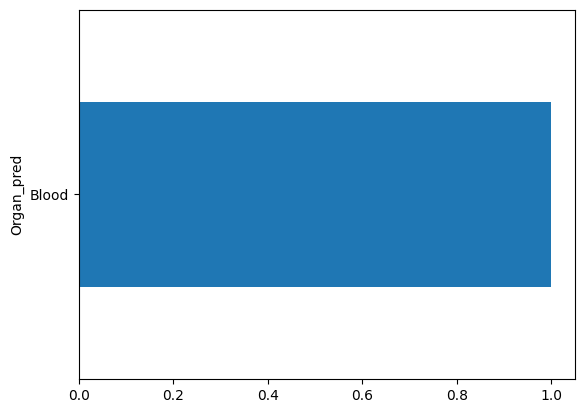

In [50]:
## Organ information prediction result
merged.value_counts('Organ_pred', normalize=True).plot.barh(stacked = True)

<Axes: ylabel='Pheno_pred'>

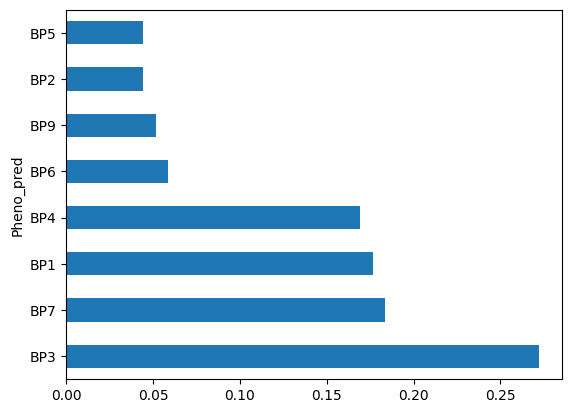

In [52]:
## Phenotype prediction result
merged.value_counts('Pheno_pred', normalize=True).plot.barh(stacked = True)

## Compare with ground truth

In [72]:
## meta information from the publication
meta1 = adata.obs.drop_duplicates('Sample').set_index("Sample")
meta1 = meta1[meta1['disease'].isin('normal,COVID-19'.split(","))].copy()

meta1['Timepoint'] = ['Control' if str(i) == 'nan'
                    else '~1 week' if int(i) <=7
                    else '1~2 weeks' if int(i) <=14
                    else '2~3 weeks' if int(i) <=21
                    else '3 weeks~' for i in meta1['TimeSinceOnset']]

# meta1['Class'] = ['Control' if i == 'normal'
#                 else j if i == 'influenza'
#                 else j if i == 'COVID-19'
#                 else 'nan' for i,j in zip(meta1['disease'], meta1['Timepoint'])]

In [73]:
merged_meta = merged.merge(meta1, left_index=True, right_index=True, how = 'inner')

In [74]:
merged_meta.value_counts("Timepoint").sort_index()

Timepoint
1~2 weeks    51
2~3 weeks    17
3 weeks~      6
Control      10
~1 week      42
dtype: int64

In [77]:
order = 'Control,~1 week,1~2 weeks,2~3 weeks,3 weeks~'.split(",")

<Axes: ylabel='Timepoint'>

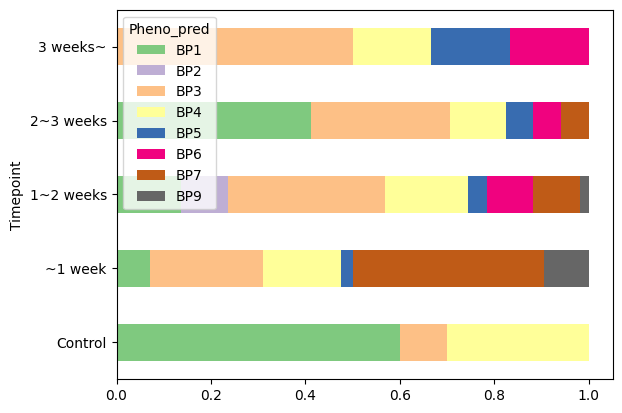

In [90]:
pd.crosstab(merged_meta['Timepoint'], merged_meta['Pheno_pred'], normalize=0).loc[order].plot.barh(stacked=True,
                                                                                                  cmap='Accent')

Text(0, 0.5, 'BP9')

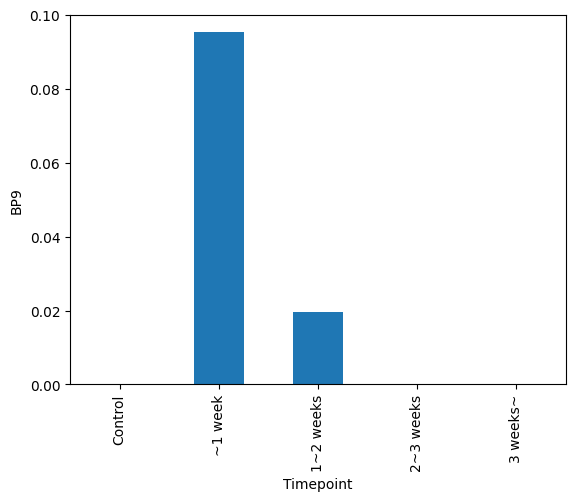

In [92]:
pd.crosstab(merged_meta['Timepoint'], merged_meta['Pheno_pred'], 
            normalize=0).loc[order,'BP9'].plot.bar(stacked=True)
plt.ylabel('BP9')